## Lesson2: PytorchでModelを定義する
- Lesson1では、pytorchでのDatasetの定義の仕方を紹介
- 本演習では、Datasetのデータを扱う*深層学習モデルの作り方*を紹介

In [2]:
# 本章で扱うモジュール
import torch
import torch.nn as nn

- Design1. Sequentialを使った定義
    - 入力と出力が1対1のネットワークが作れる
    - Sequentialの中に、処理をまとめて書くことはできるが**分岐条件などを取り入れた複雑なネットワークは作れない**

In [3]:
# Step 1 モデルの定義
model = nn.Sequential(
    nn.Linear(3, 5),
    nn.Linear(5, 10)
)
# Step 2 インプットデータの用意
input = torch.randn(5,3)
print('input  =\n{}'.format(input))
# Step 3 
output = model(input)
print('output =\n{}'.format(output))

input  =
tensor([[ 0.7436,  0.2714,  1.0562],
        [-0.9216, -1.2756,  0.4119],
        [-0.2496,  0.3968, -1.5520],
        [-1.6440, -0.9840,  2.5630],
        [-0.1506,  0.8875,  1.8932]])
output =
tensor([[ 0.5036,  0.3235, -0.5669, -0.3003, -0.4349,  0.5386,  1.1480,  0.2871,
         -1.0151, -0.2714],
        [ 0.2948,  0.7309, -0.4578, -0.2791, -0.6015,  0.4593,  0.7650,  0.1899,
         -0.9457, -0.2177],
        [-0.2590,  0.4015, -0.8235,  0.2337, -0.1212, -0.0505,  0.3788, -0.0058,
         -0.1648,  0.0127],
        [ 0.7093,  1.1341, -0.1508, -0.7681, -0.9388,  0.9422,  1.1576,  0.3258,
         -1.6541, -0.4454],
        [ 0.5481,  0.6739, -0.4245, -0.4982, -0.5668,  0.7131,  1.1993,  0.2851,
         -1.2697, -0.3534]], grad_fn=<AddmmBackward>)


In [4]:
# 今度は畳み込み中心で
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), # nn.Conv2dで画像の畳み込み
    nn.ReLU(inplace=True),                                # nn.ReLUで活性化処理
    nn.MaxPool2d(4,2,1),
    nn.Conv2d(64, 64, kernel_size=4, stride=2, padding=1),
    nn.BatchNorm2d(64)
)
print(model)
input = torch.randn(5, 3, 64, 64)
print('input  =\n{}'.format(input.size()))
output = model(input)
print('output =\n{}'.format(output.size()))

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=4, stride=2, padding=1, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
input  =
torch.Size([5, 3, 64, 64])
output =
torch.Size([5, 64, 16, 16])


- Design2. nn.Moduleを継承した定義
    - ネットワークをクラスとして作成する
    - __init__メソッド(初期化メソッド)にネットワークの定義を、forwardメソッドに順伝播の計算を書く
    - 複雑なネットワークを定義できる、githubのpytorch関連でもこの形式で書かれるのがよく見かける

In [5]:
# クラス変数に関数を定義する書き方
class myNetwork(nn.Module):
    def __init__(self):
        super(myNetwork, self).__init__()
        self.conv0 = nn.Conv2d(3, 64, 3, 1, 1)
        self.act0 = nn.ReLU(True)
        self.conv1 = nn.Conv2d(64, 64, 4, 2, 1)
        self.norm1 = nn.BatchNorm2d(64)
    def forward(self, input):
        x = self.conv0(input)
        x = self.act0(x)
        x = self.conv1(x)
        x = self.norm1(x)
        return x
    
model = myNetwork()
print(model)
input = torch.randn(5, 3, 64, 64)
output = model(input)
print('output =\n{}'.format(output.size()))

myNetwork(
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act0): ReLU(inplace=True)
  (conv1): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
output =
torch.Size([5, 64, 32, 32])


In [6]:
# クラス変数にSequentialで処理をまとめて定義する書き方 <-こちらの書き方はよく見かける
class myNetwork(nn.Module):
    def __init__(self):
        super(myNetwork, self).__init__()
        self.conv = nn.Sequential(*[
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.ReLU(True),
            nn.Conv2d(64, 64, 4, 2, 1),
            nn.BatchNorm2d(64)
        ])
    def forward(self, input):
        x = self.conv(input)
        return x

model = myNetwork()
print(model)
input = torch.randn(5, 3, 64, 64)
output = model(input)
print('output =\n{}'.format(output.size()))

myNetwork(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
output =
torch.Size([5, 64, 32, 32])


### 演習問題1
#### Q1. 以下の図のモデル構造をpytorchで書いてみよう
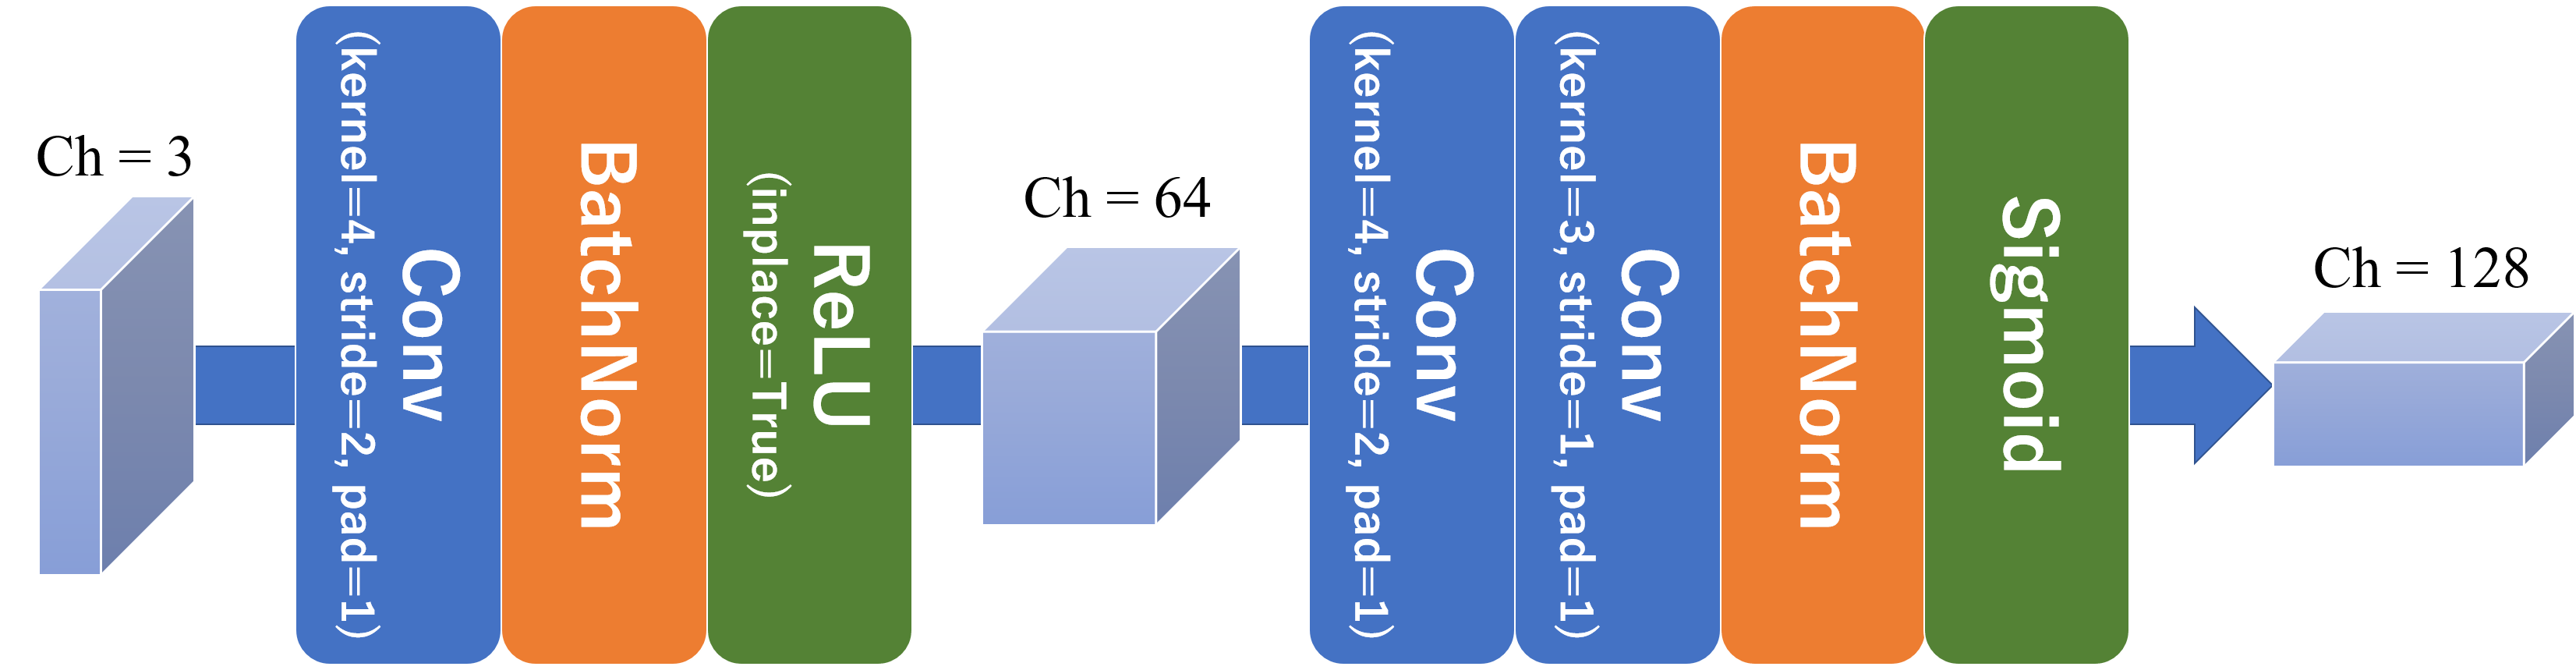

#### Q2. 以下の図のモデル構造をpytorchで書いてみよう
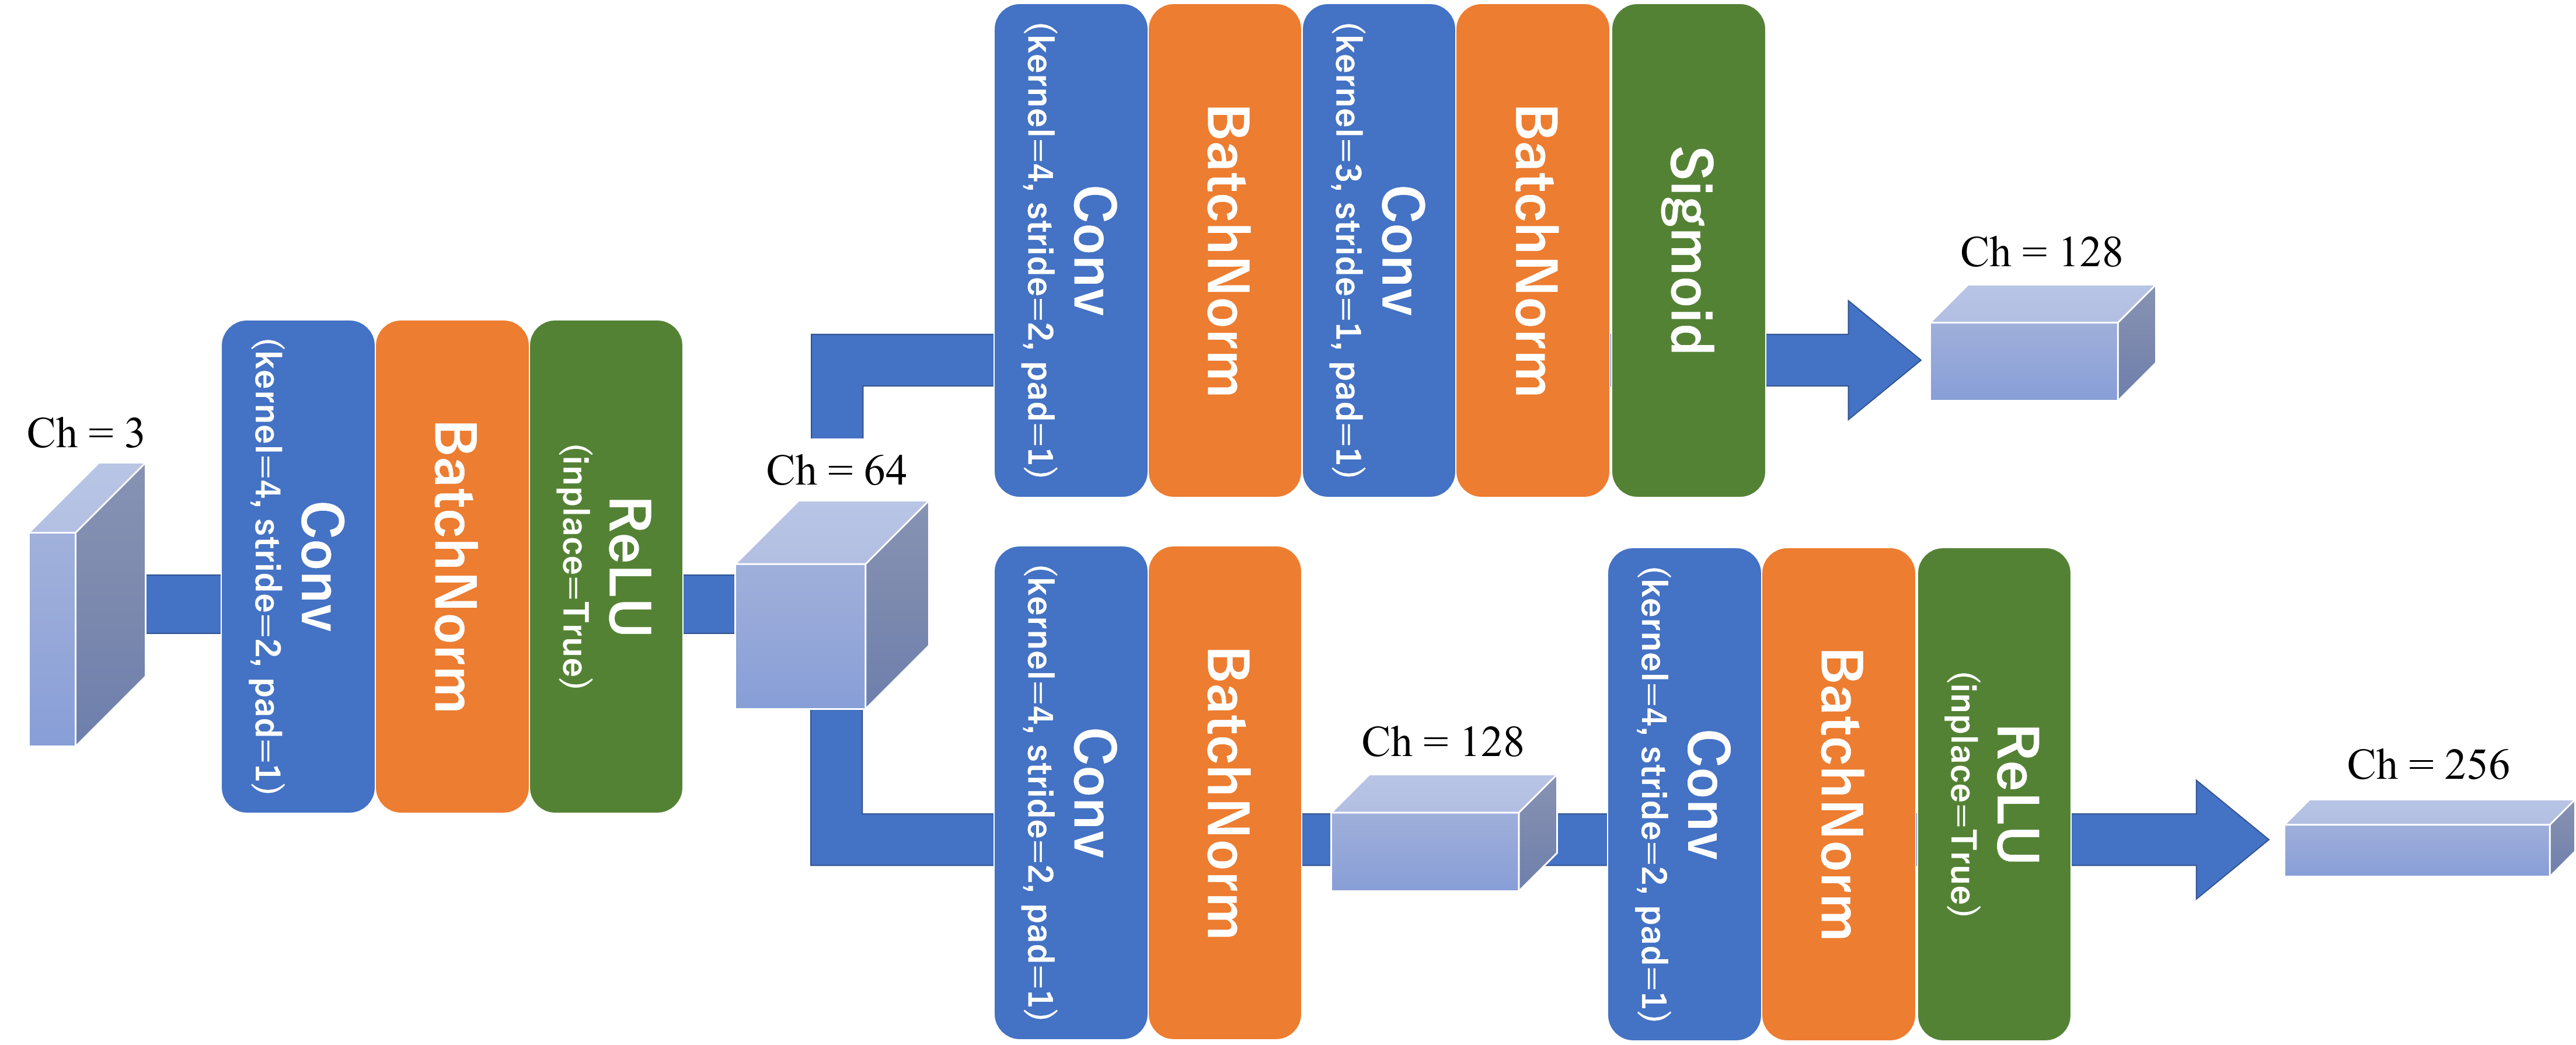


- Design3. nn.ModuleListで楽に順伝播計算
    - nn.Sequentialでは畳み込みや活性化関数等の処理をまとめて1つのクラス変数として定義することができたが、forwardメソッドで逐次対応するクラス変数を書く必要がある
    - まとまった処理らをList化して、for文で処理を呼び出そう

In [7]:
class myNetwork(nn.Module):
    def __init__(self):
        super(myNetwork, self).__init__()
        self.convs = nn.ModuleList([
            nn.Sequential(*[
                nn.Conv2d(3, 64, 4, 2, 1),
                nn.BatchNorm2d(64),
                nn.ReLU(True)
            ]),
            nn.Sequential(*[
                nn.Conv2d(64, 64, 4, 2, 1),
                nn.BatchNorm2d(64),
                nn.ReLU(True)
            ])
        ])
    def forward(self, x):
        for idx, m in enumerate(self.convs):
            x = m(x)
        return x

model = myNetwork()
print(model)
input = torch.randn(5, 3, 64, 64)
output = model(input)
print('output =\n{}'.format(output.size()))

myNetwork(
  (convs): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
)
output =
torch.Size([5, 64, 16, 16])


- Design4. nn.ModuleDictで順伝播計算
    - Pythonの辞書型といえば、{'apple':0, 'orange':1}のようにkey値とvalue値を紐づけて定義
    - List型とは違って配列のindex番号を把握してなくても、自分で決めたkey値で呼び出せるので楽ですね
    - 処理名を名前付きで定義できる辞書型と同じ機能があるので、知っておこう

In [8]:
class myNetwork(nn.Module):
    def __init__(self):
        super(myNetwork, self).__init__()
        self.convs = nn.ModuleDict({
            'conv0': nn.Sequential(*[
                nn.Conv2d(3, 64, 4, 2, 1),
                nn.BatchNorm2d(64),
                nn.ReLU(True)
            ]),
            'conv1': nn.Sequential(*[
                nn.Conv2d(64, 64, 4, 2, 1),
                nn.BatchNorm2d(64),
                nn.ReLU(True)
            ])
        })
    def forward(self, x):
        x = self.convs['conv0'](x)
        x = self.convs['conv1'](x)
        return x

model = myNetwork()
print(model)
input = torch.randn(5, 3, 64, 64)
output = model(input)
print('output =\n{}'.format(output.size()))

myNetwork(
  (convs): ModuleDict(
    (conv0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (conv1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
)
output =
torch.Size([5, 64, 16, 16])


### 演習問題2 
#### Q1. Design3あるいはDesign4の書き方になるべく寄せながら、以下の図のモデル構造をpytorchで書いてみよう
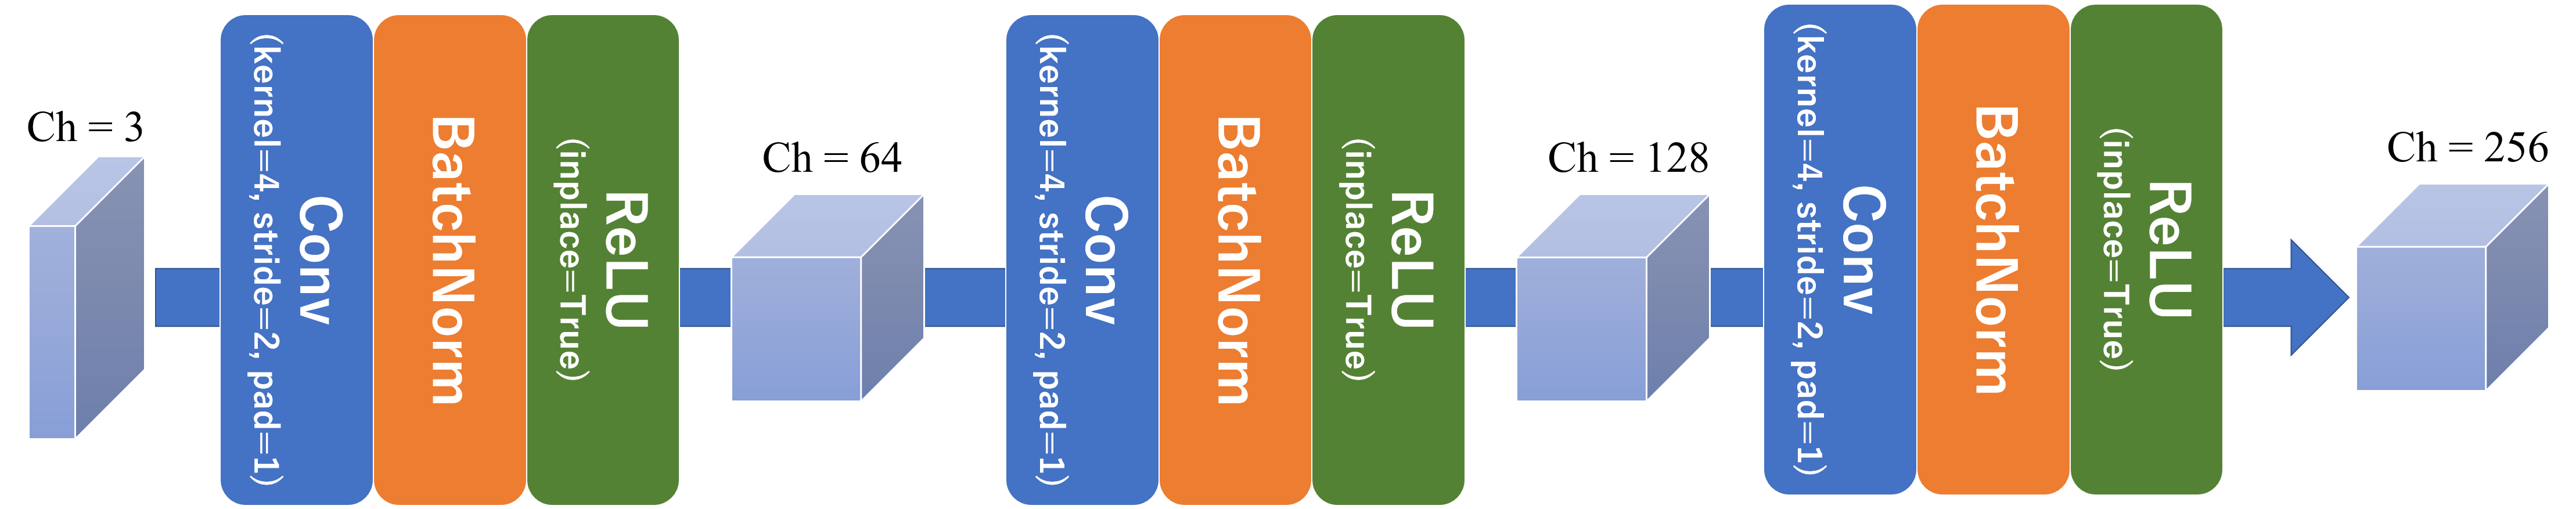
#### Q2. Design3あるいはDesign4の書き方になるべく寄せながら、以下の図のモデル構造をpytorchで書いてみよう
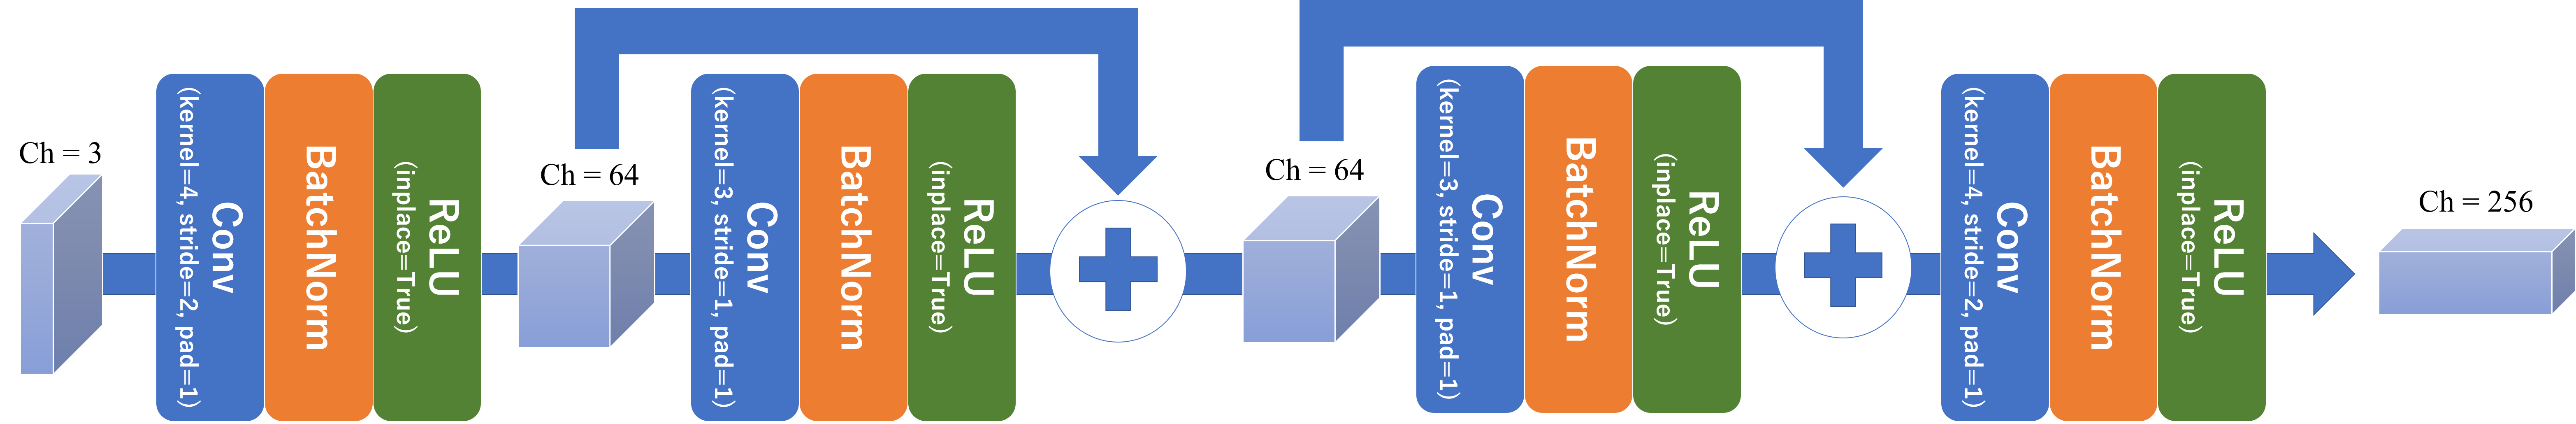

# ‼次の演習では、演習問題1・2で作成したモデルで実際にクラス分類を行う(かもしれない)ので是非実施しよう‼